In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bioinformtica-archivos-abi/310.ab1


In [2]:
!pip install Bio

     |████████████████████████████████| 73 kB 292 kB/s eta 0:00:01


A continuación muestro una sesión de terminal IPython interactiva, usando mi propio archivo de secuenciación Sanger, pero funcionará con otros archivos AB1.

En primer lugar, leemos en el archivo ABI:****[](http://)](http://)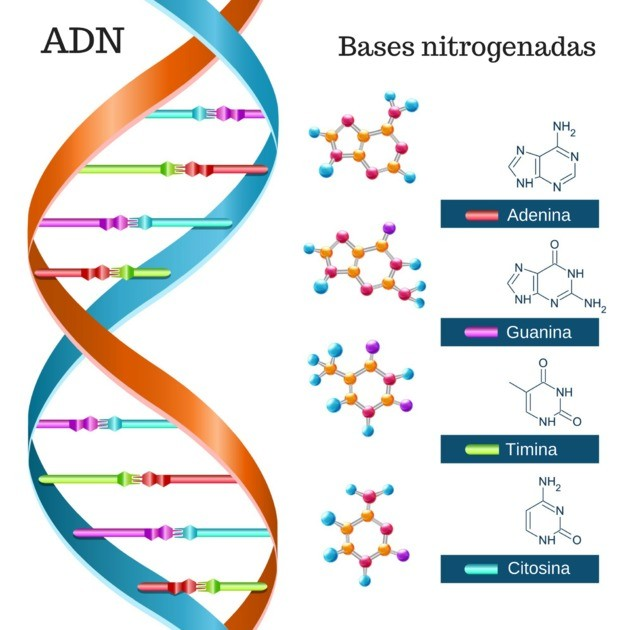

In [5]:
from Bio import SeqIO

record = SeqIO.read("/kaggle/input/bioinformtica-archivos-abi/310.ab1", "abi")
record

SeqRecord(seq=Seq('TGATNTTNACNNTTTTGAANCANTGAGTTAATAGCAATNCTTTACNAATAAGAA...NNG'), id='D11F', name='310', description='', dbxrefs=[])

In [4]:
 list(record.annotations.keys())

['sample_well',
 'dye',
 'polymer',
 'machine_model',
 'run_start',
 'run_finish',
 'abif_raw',
 'molecule_type']

In [6]:
list(record.annotations["abif_raw"].keys())

['AEPt1',
 'AEPt2',
 'APXV1',
 'APrN1',
 'APrV1',
 'APrX1',
 'ASPF1',
 'ASPt1',
 'ASPt2',
 'B1Pt1',
 'B1Pt2',
 'BCTS1',
 'CCDF1',
 'CCDF2',
 'CCDF3',
 'CCDF4',
 'CMNT1',
 'CpEP1',
 'DATA1',
 'DATA2',
 'DATA3',
 'DATA4',
 'DATA5',
 'DATA6',
 'DATA7',
 'DATA8',
 'DATA9',
 'DATA10',
 'DATA11',
 'DATA12',
 'Dye#1',
 'DyeN1',
 'DyeN2',
 'DyeN3',
 'DyeN4',
 'DyeS1',
 'DyeS2',
 'DyeS3',
 'DyeS4',
 'DyeZ1',
 'DyeZ2',
 'DyeZ3',
 'DyeZ4',
 'EPVt1',
 'EVNT1',
 'EVNT2',
 'EVNT3',
 'EVNT4',
 'FTab1',
 'FVoc1',
 'FWO_1',
 'Feat1',
 'InSc1',
 'InVt1',
 'LANE1',
 'LNTD1',
 'LsrP1',
 'MCHN1',
 'MODF1',
 'MODL1',
 'MTRD1',
 'MTRD101',
 'MTRD102',
 'MTRD103',
 'MTRX1',
 'MTRX101',
 'MTRX102',
 'MTRX103',
 'MTXF1',
 'MTXF2',
 'OFFS1',
 'PBAS1',
 'PBAS2',
 'PCON1',
 'PCON2',
 'PDMF1',
 'PDMF2',
 'PLOC1',
 'PLOC2',
 'RUND1',
 'RUND2',
 'RUND3',
 'RUND4',
 'RUNT1',
 'RUNT2',
 'RUNT3',
 'RUNT4',
 'Rate1',
 'RevC1',
 'S/N%1',
 'SMED1',
 'SMLt1',
 'SMPL1',
 'SPAC1',
 'SPAC2',
 'SPAC3',
 'SVER1',
 'SVER2',
 'SVE

De acuerdo con la especificación de datos de ABI (página 40), todos los datos necesarios para las huellas que se muestran convencionalmente son en la DATA9a través de DATA12canales. Podemos capturar estos canales de manera programática. Sin embargo, no se indica claramente qué letras corresponden a qué color y, por lo tanto, qué canal exacto.

In [7]:
from collections import defaultdict

channels = ["DATA9", "DATA10", "DATA11", "DATA12"]
trace = defaultdict(list)
for c in channels:
    trace[c] = record.annotations["abif_raw"][c]

Ahora, es posible graficarlos en una matplotlibfigura.

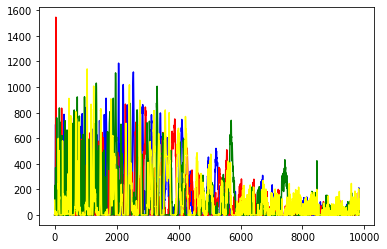

In [9]:
import matplotlib.pyplot as plt
plt.plot(trace["DATA9"], color="blue")
plt.plot(trace["DATA10"], color="red")
plt.plot(trace["DATA11"], color="green")
plt.plot(trace["DATA12"], color="yellow")
plt.show()

aca podemos apreciar el grafico de bases nitrogenadas es una muestra de la manipulaci9on de archivos .abi. ....saludos.